# 自注意力机制

在传统的CNN中，都是对感受野内部的事情进行关联后理解。

感受野实际上关乎了模型对全局信息的理解。

而本质上，感受野是一种特殊的注意力机制，也就是说感受野是一种受限的、具有特定参数的注意力。

之前所讲授的内容如DANet，则更加接近广义的注意力机制。

在这种机制的作用下，像素与像素间的内容会产生相互联系，通过注意力权重矩阵，对图像中全局的信息进行提取和理解。

而"attention is all your need"这篇文章中，提出了一种全新的注意力机制，其意义在于：

1. 从原理上解释了CNN和RNN的一般形式
2. 为NLP和CV的大一统模型建立的基础
3. 从后续的swin transformer的刷榜提供了理论和技术支撑

如果总结近10年的人工智能发展，除了alexnet之外，就当属transformer这篇文章。

## 序列到序列的模型

目前所接触的图像任务，都是单一输入到单一输出的情况。

如果在复杂任务中，则会出现输入一个序列，输出一个序列的场景。

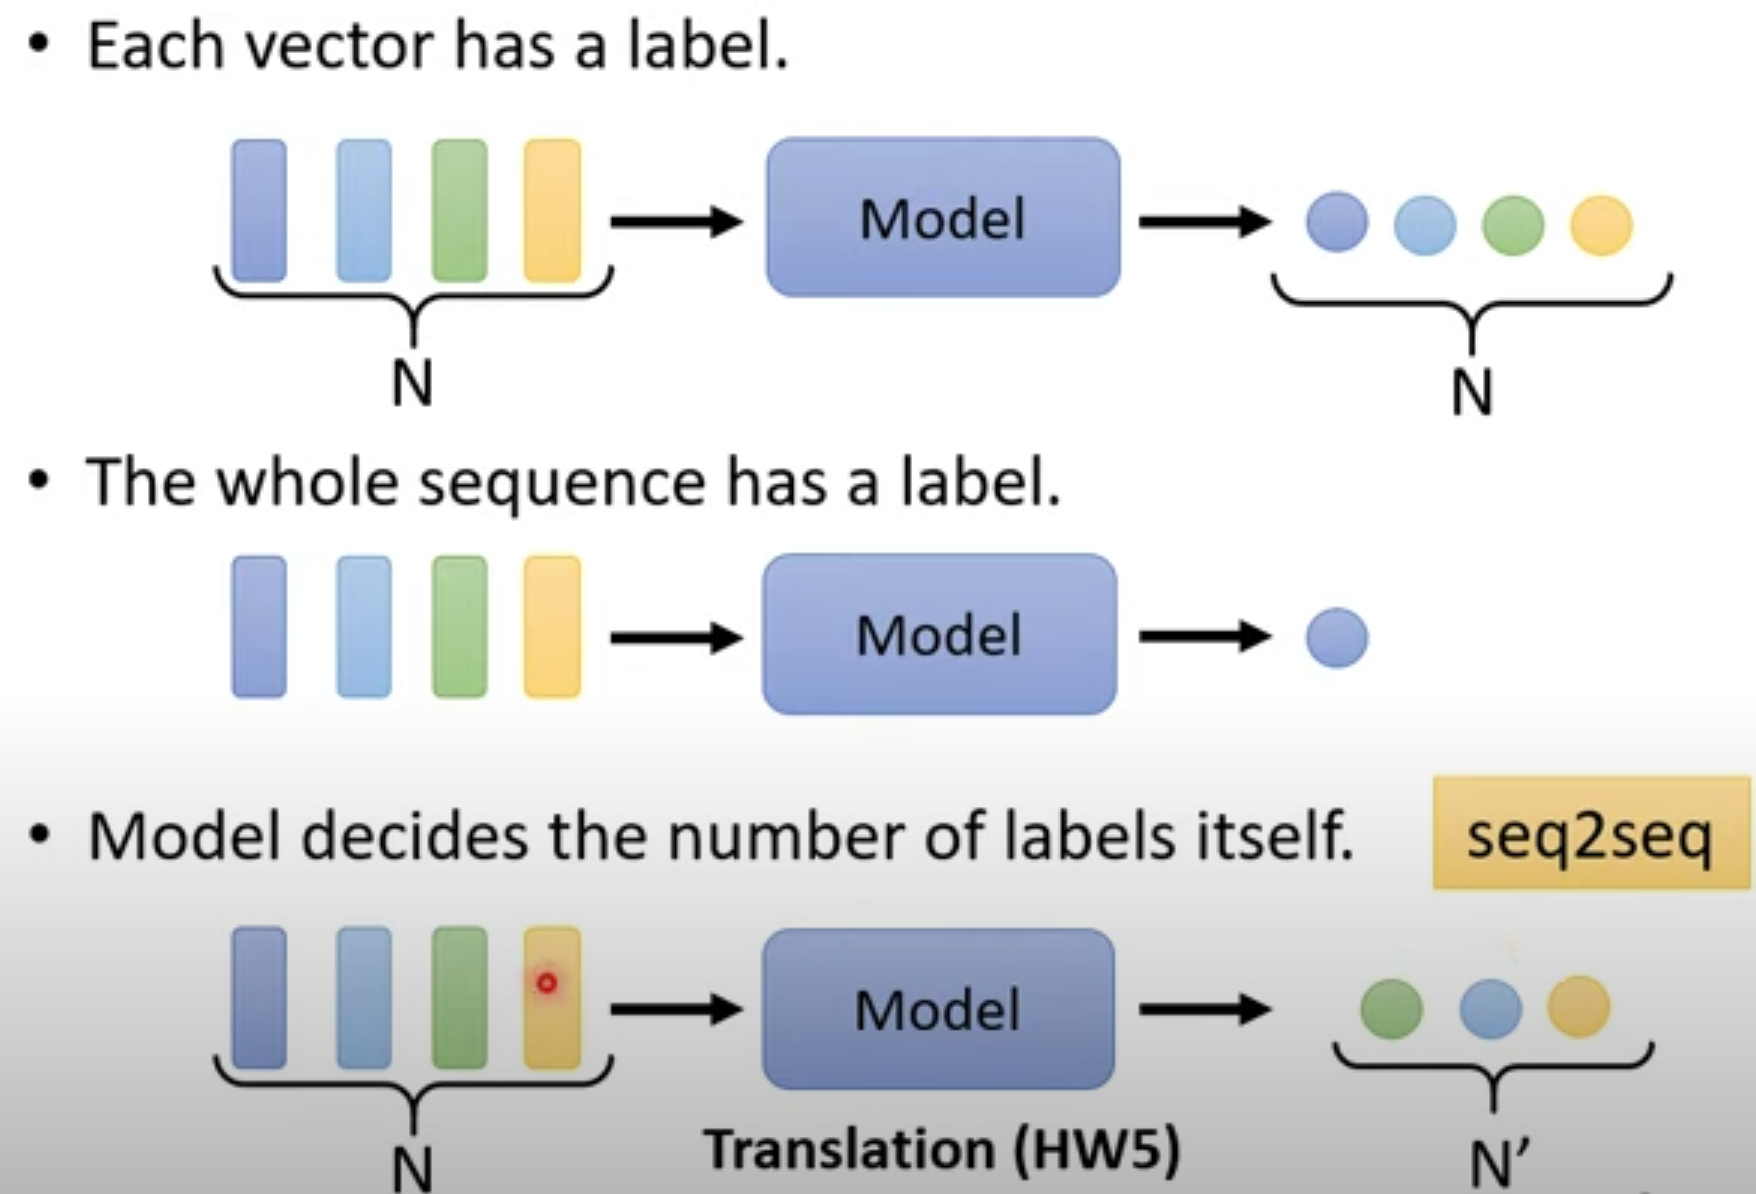

这就是seq2seq模型。

seq2seq模型中，主要是用于NLP领域，例如分词、词性判断、语义问答等等。

显然，一个单词就是一个输入，一句话就组成了一个序列。

在图像中，如何使用序列输入？

2020年经典论文Vision Transformer中，就将这个问题建模为了一种图像patch输入的序列化处理。

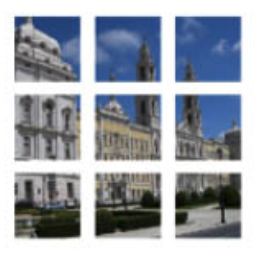

其中，一张图像被不重叠地切割成了若干个小块。

所有小块按顺序连接起来，组成输入序列。

这也是图像与自然语言处理大一统的关键步骤。

## seq2seq模型中天然要解决的问题

输入序列中无法有效的沟通和交流，从而无法建立长效的序列间的通信机制，从而无法实现可靠的处理。

常规的对于序列输入的处理方法(如视频、多帧图像等等)，一些常用的思路有什么？

1. 依次输入，依次输出

2. 合并成矩阵进行输入

3. RNN

显然，第一种方法缺少可靠性，因为无法沟通。

第二种方法不够灵活，因为需要固定长度输入。

第三种方法在此之前用的比较多，因为他能够充分沟通前后序列信息

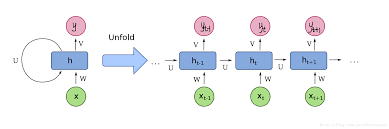

然而，即便采用RNN的方法也存在局限，因为他只能关注前后有限个序列的关联。(长序列产生较高复杂度)

**序列到序列模型的最终目的**

seq2seq的最终目的在于，所输出的内容，都是充分考虑了其他序列中的内容所得到的。

### 一种通用的思路

通用的思路就如同全连接

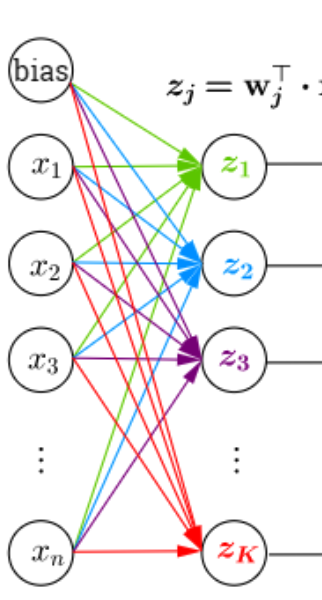

显然，全连接并不可靠，计算复杂度太高，容易过拟合都是他的缺点。

这里，就有attention出场了。

## self-attention的基本过程

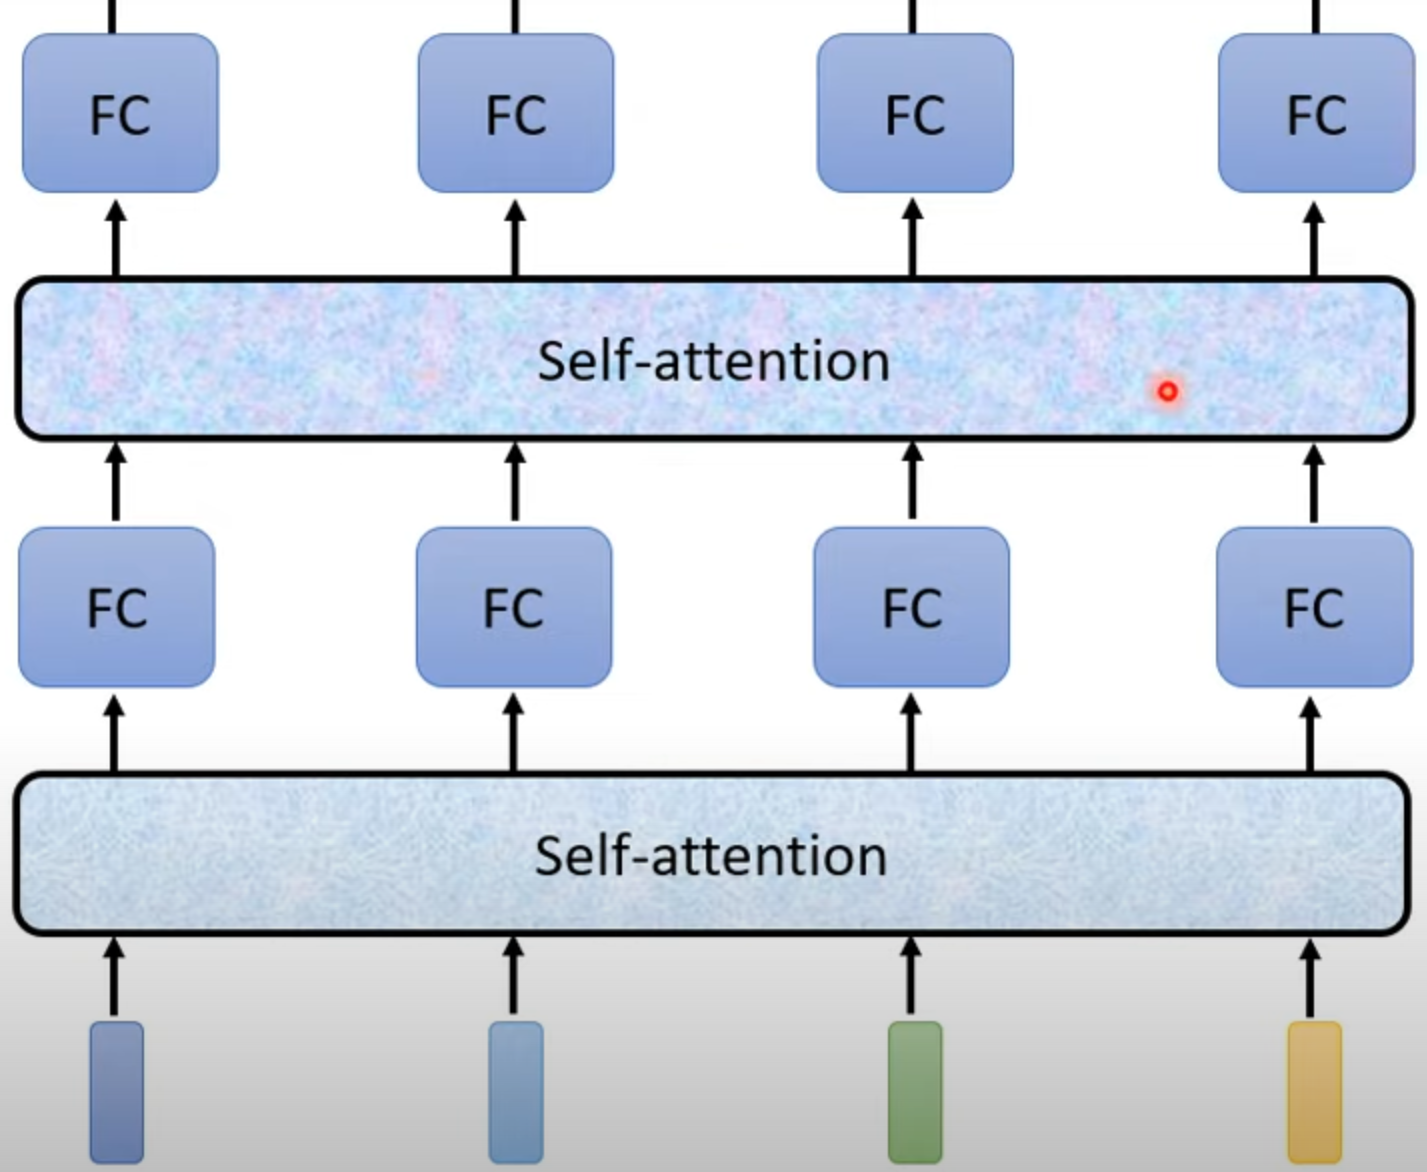

序列输入后，每个序列进入自注意力模块，计算出对应的输出

这些输出综合了所有序列的信息，具有更加广泛的全局性特征。

这些特征可以进而作为下一个attention模块的输入，逐级泛化，从而得到可靠的输出。

上述过程就是transformer的基本过程。

对于self-attention模块，可以简单的视为一个这样的模块：

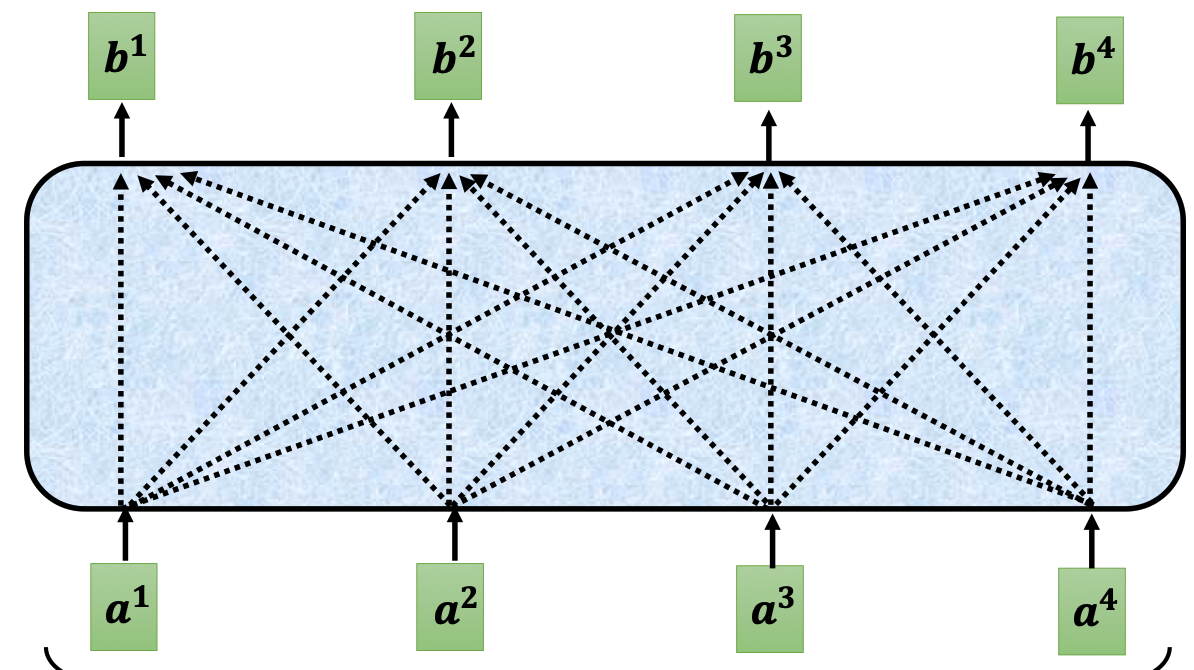

在这样的模块中，b1的结果，是综合了a1到a4的多个输入的结果。

那么如何实现这样的过程？

**自注意模块的两个过程：** 

1. 计算序列间的相关性
2. 为每个输出加入不同的相关性权重

$$b_1 = \sum_i \alpha_i a_i$$

### 计算序列间的相关性

先简化到最基本的情况，对于两个样本来说，如何计算他们之间的相关性？

有这么几个步骤：

1. 先变换到一个便于度量的特征空间

2. 用一种方法将二者度量



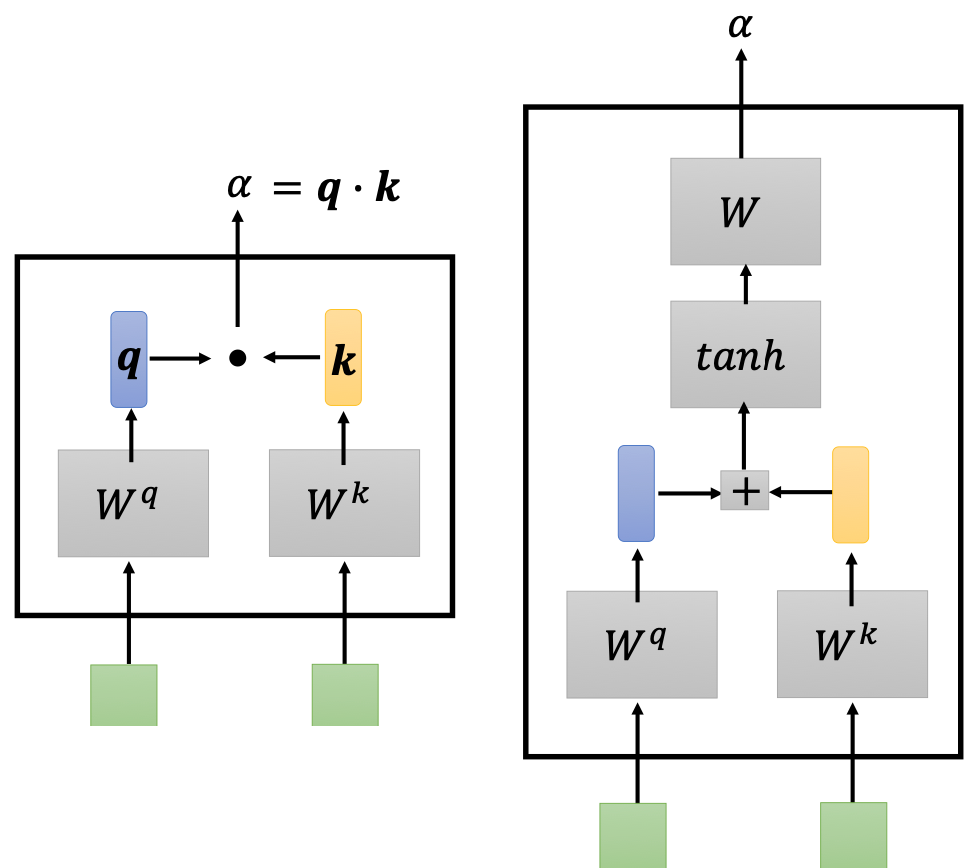

这里采用第一种方式：

1. 特征a和b分别经过两个不同的矩阵变换，得到embedding表达
2. embedding相乘之后，得到两者之间的相关性。

在self attention中，将所有的输入元素融合到一起，就可以得到两两间的相关性系数，即为权重系数。

注意，为了避免尺度不一致，这里需要对一个元素对其他序列元素的相关性的指标进行归一化（softmax）

具体上，如下图所示

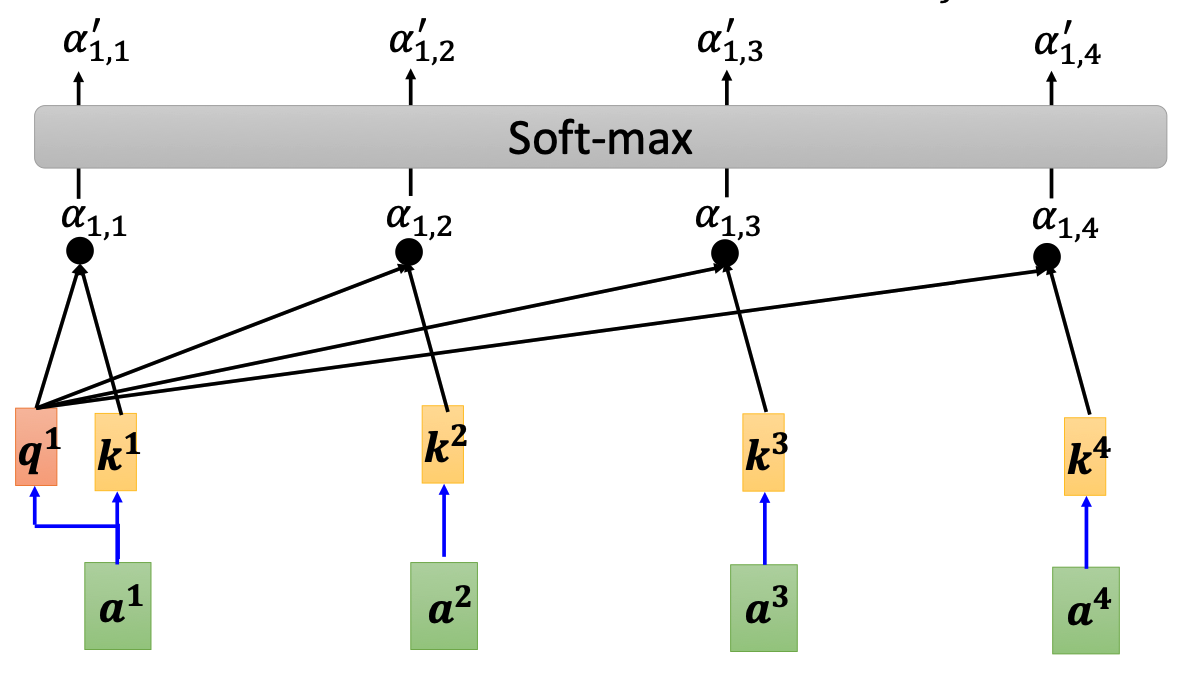

### 加入权重

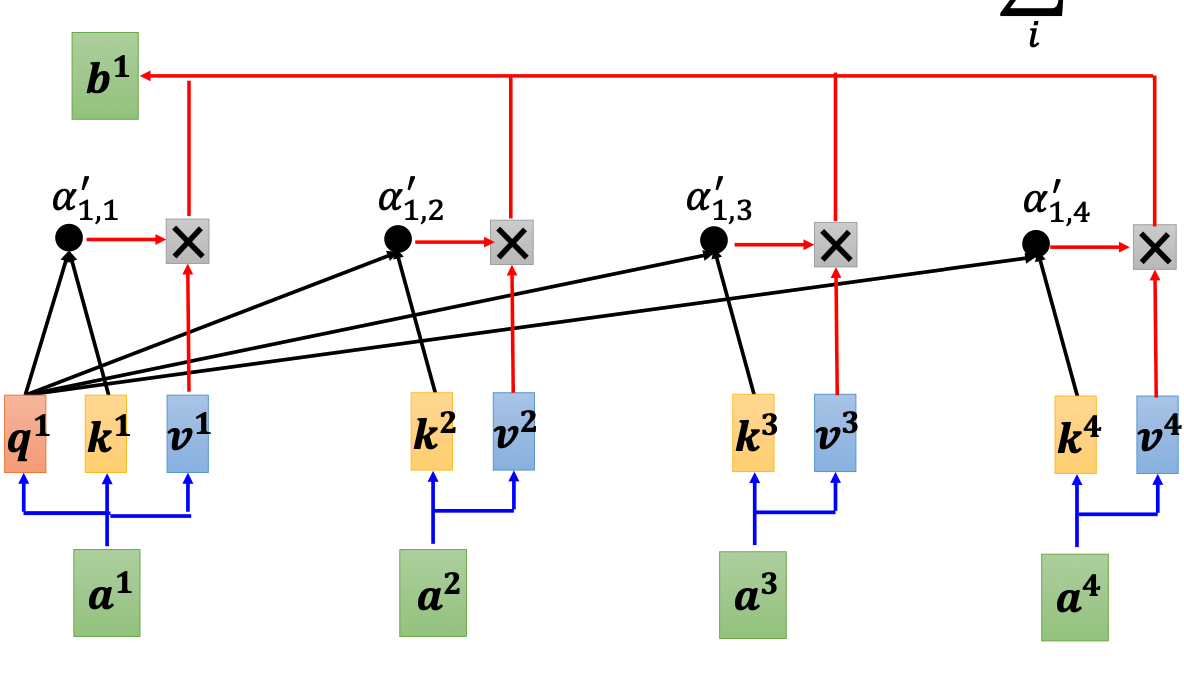

通过矩阵V来得到对应权重的输入，从而获得更好的表达。

对于矩阵V来说，是综合了不同的权重的内容。

### 总体框架

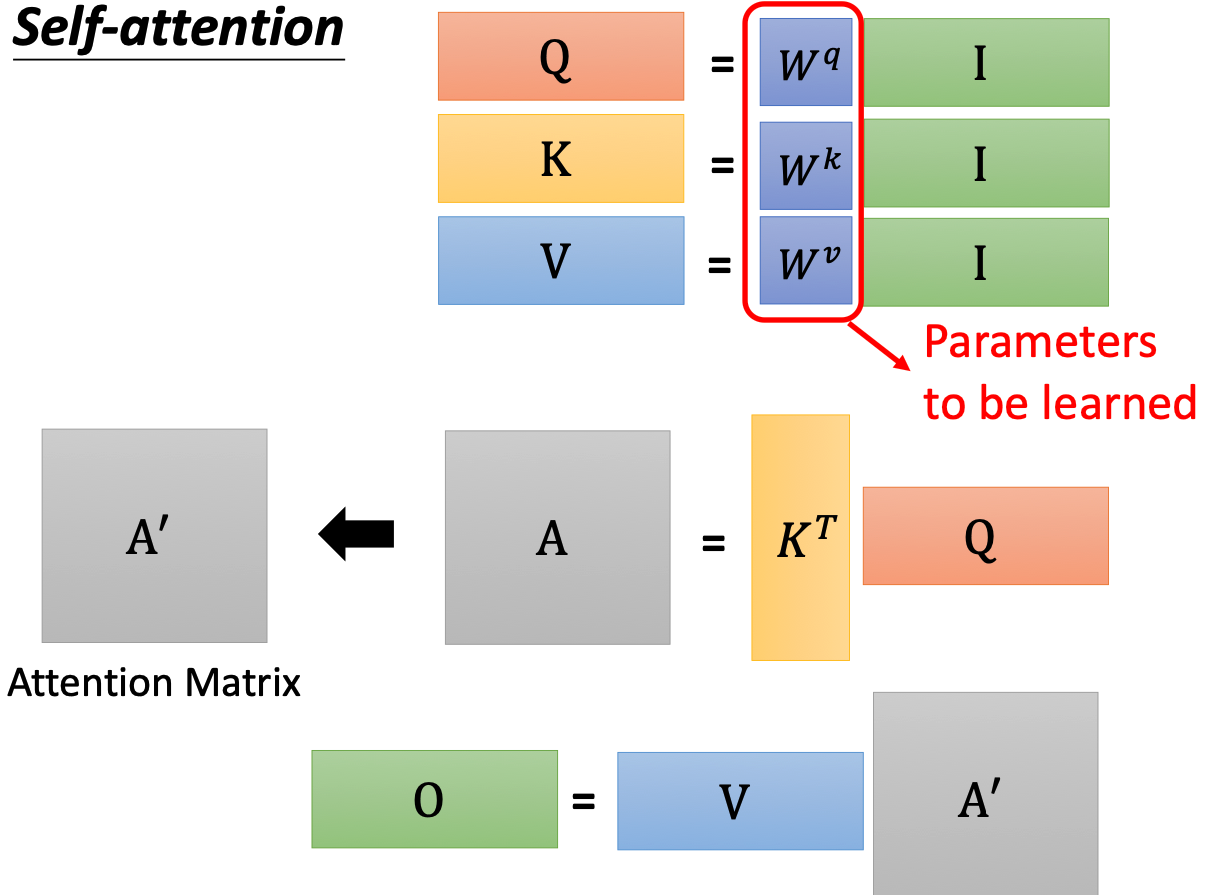

## 一些细节

1. 多头注意力
2. 位置信息



### 多头注意力机制

多头，指的是产生多组qkv矩阵，从而获得更加个性化的权重矩阵。

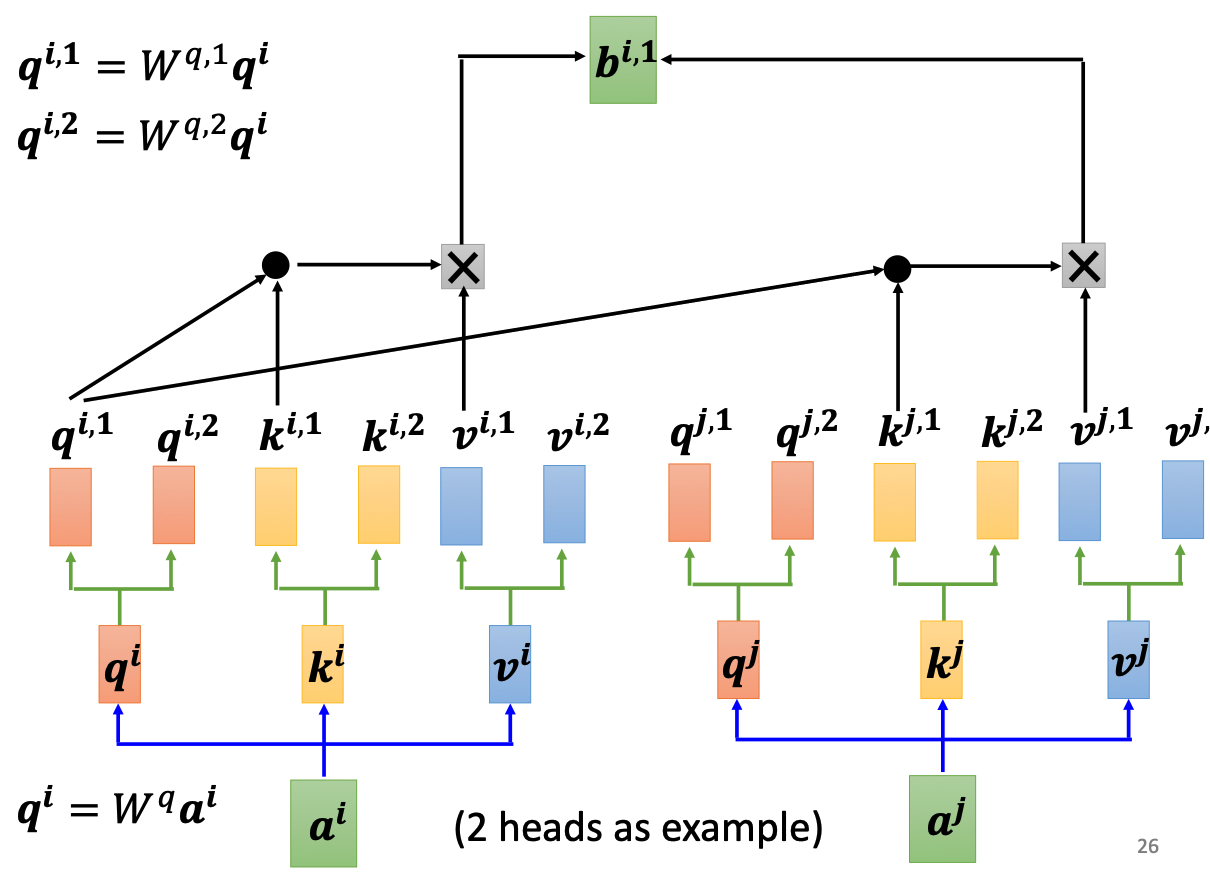



### 位置矩阵

实际上，将图像切成若干个patch，并将其随机打乱，得到的结果对于transformer来说没有任何区别。

这显然是不正常的。所以，我们需要为每个序列中的输入加入位置信息，来补充信息。

所谓位置信息，就是生成一种和位置相关的特征编码，从而来获得更好的结果。

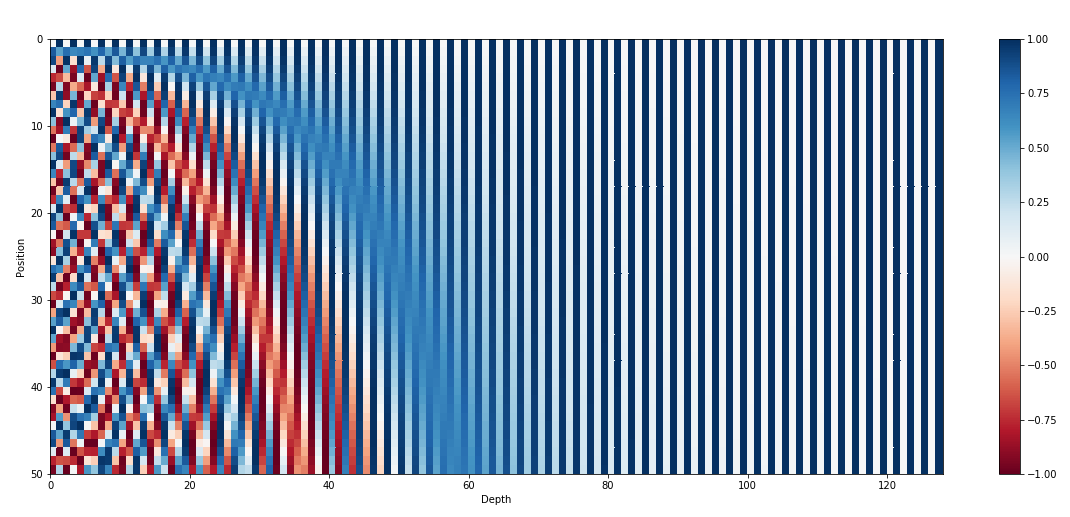

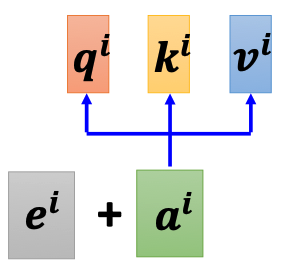

## 自注意力与卷积

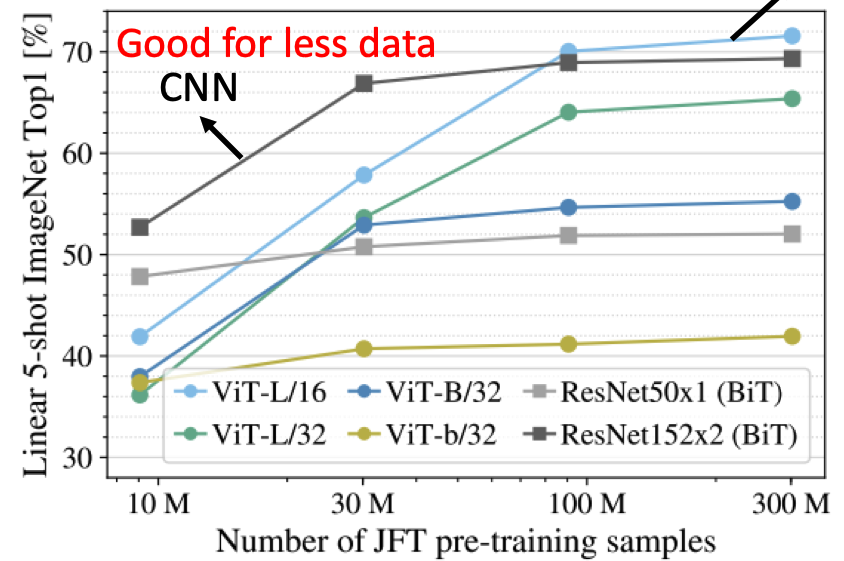

## Transformer

transformer是一种深度学习框架，在图像领域可以用于图像分类(ViT)以及经典图像处理任务的处理(SwinTransformer)

从功能上，transfomer分为两个部分：

1. encoder
2. decoder



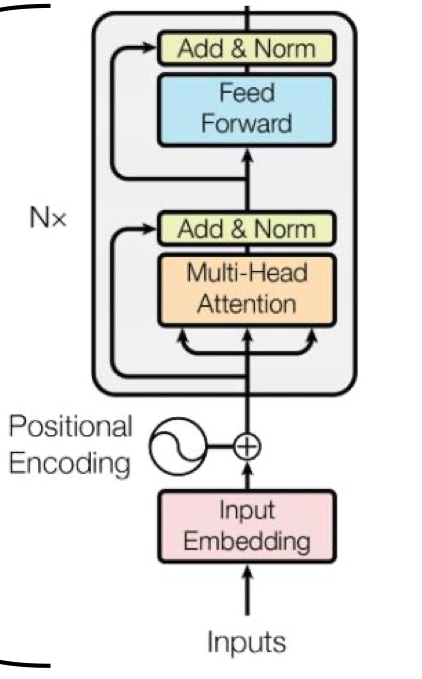

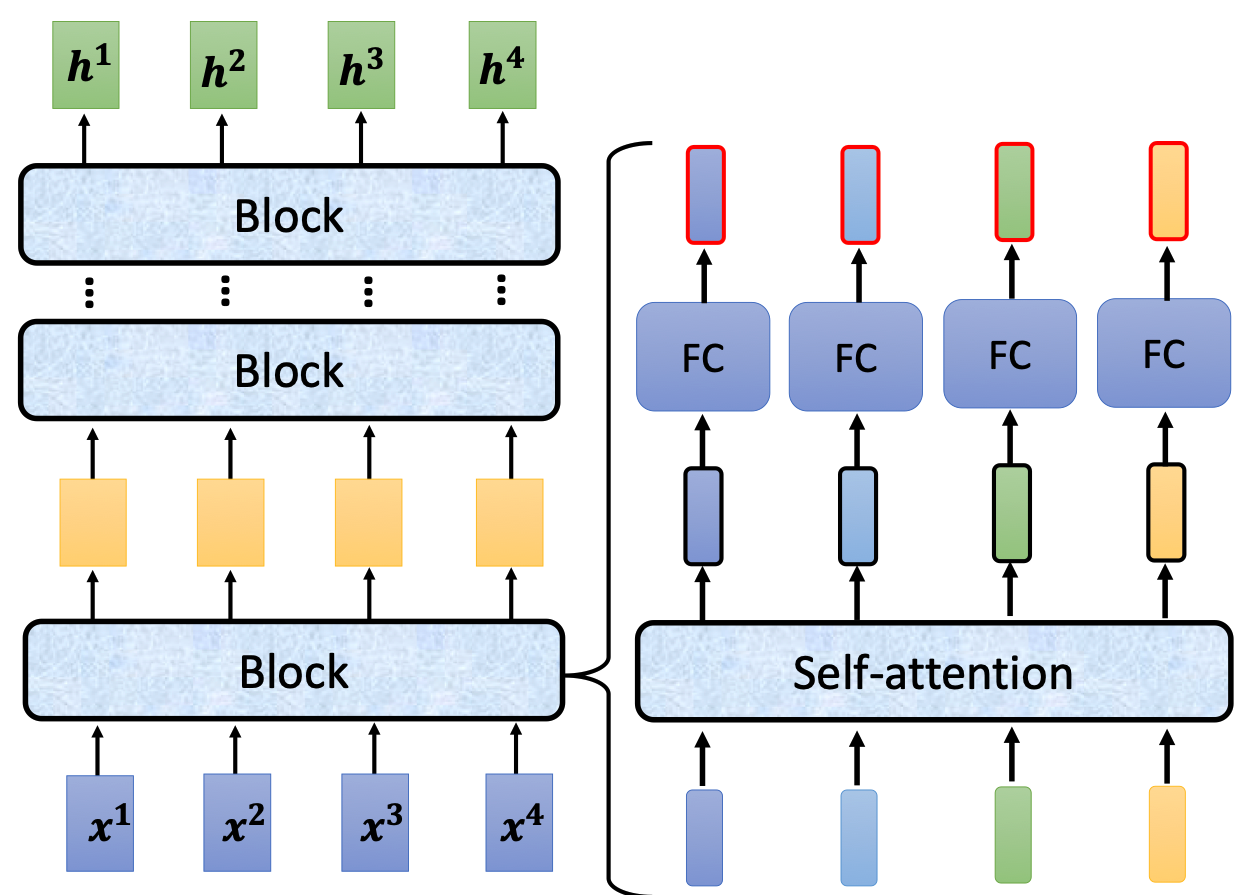

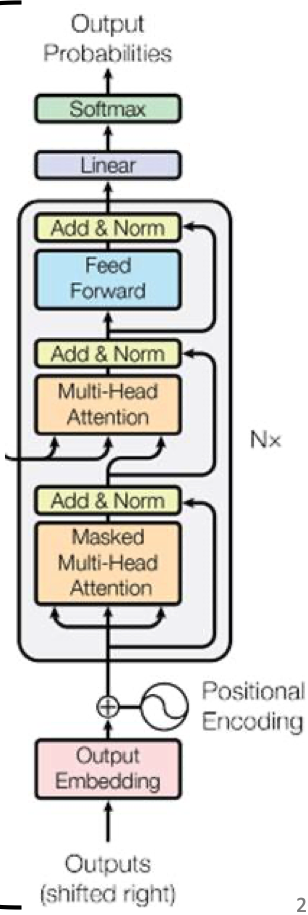

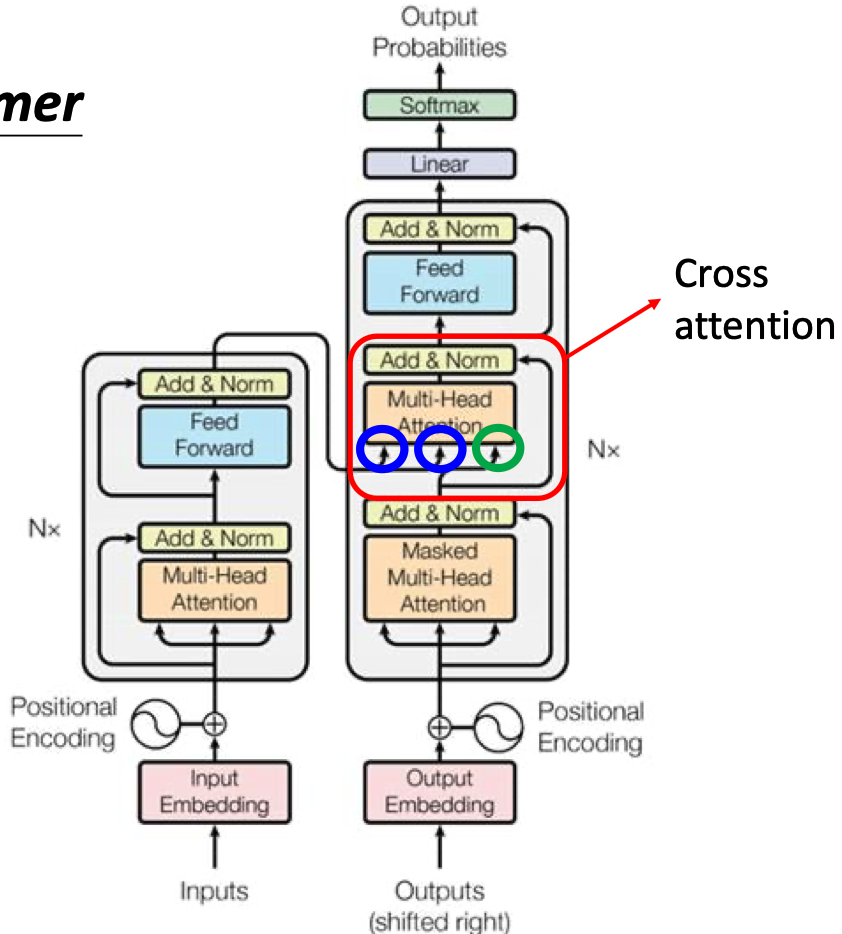

## 关于VIT

vision transformer是用于视觉任务的transformer

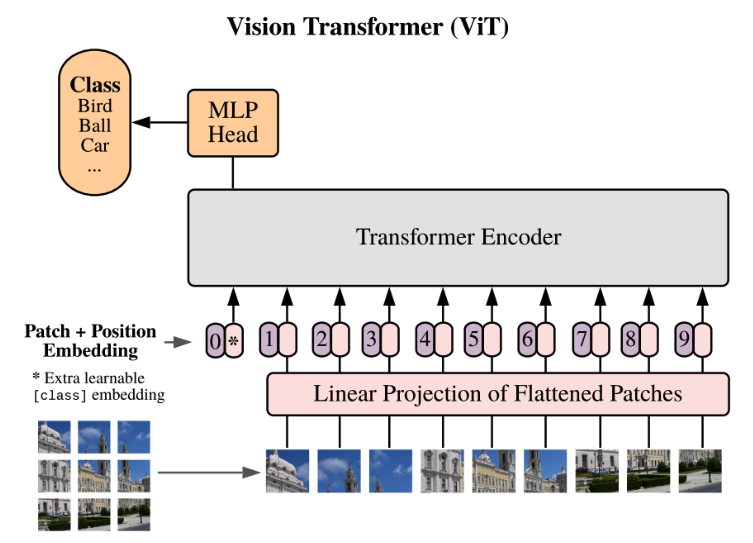

### 代码



In [2]:
import torch
from torch import nn, einsum
import torch.nn.functional as F

In [3]:
class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim, dropout=0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, dim), 
            nn.Dropout(dropout)
        )
    def forward(self, x):
        return self.net(x)

In [4]:
   
class Attention(nn.Module):              
    def __init__(self, dim, heads=8, dim_head=64, dropout=0.):
        super().__init__()
        inner_dim = dim_head * heads
        project_out = not (heads == 1 and dim_head == dim)

        self.heads = heads
        self.scale = dim_head ** -0.5

        self.attend = nn.Softmax(dim=-1)
        self.to_qkv = nn.Linear(dim, inner_dim * 3, bias=False)

        self.to_out = nn.Sequential(
            nn.Linear(inner_dim, dim),
            nn.Dropout(dropout),
        ) if project_out else nn.Identity()

    def forward(self, x):
        b, n, _, h = *x.shape, self.heads
        qkv = self.to_qkv(x).chunk(3, dim=-1)           # (b, n(65), dim*3) ---> 3 * (b, n, dim)
        q, k, v = map(lambda t: rearrange(t, 'b n (h d) -> b h n d', h=h), qkv)          # q, k, v   (b, h, n, dim_head(64))

        dots = einsum('b h i d, b h j d -> b h i j', q, k) * self.scale

        attn = self.attend(dots)

        out = einsum('b h i j, b h j d -> b h i d', attn, v)
        out = rearrange(out, 'b h n d -> b n (h d)')
        return self.to_out(out)


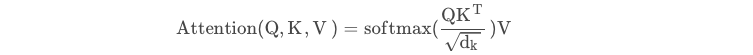

In [5]:

class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim, dropout=0.):
        super().__init__()
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                PreNorm(dim, Attention(dim, heads=heads, dim_head=dim_head, dropout=dropout)),
                PreNorm(dim, FeedForward(dim, mlp_dim, dropout=dropout))
            ]))
    
    def forward(self, x):
        for attn, ff in self.layers:
            x = attn(x) + x
            x = ff(x) + x
        return x


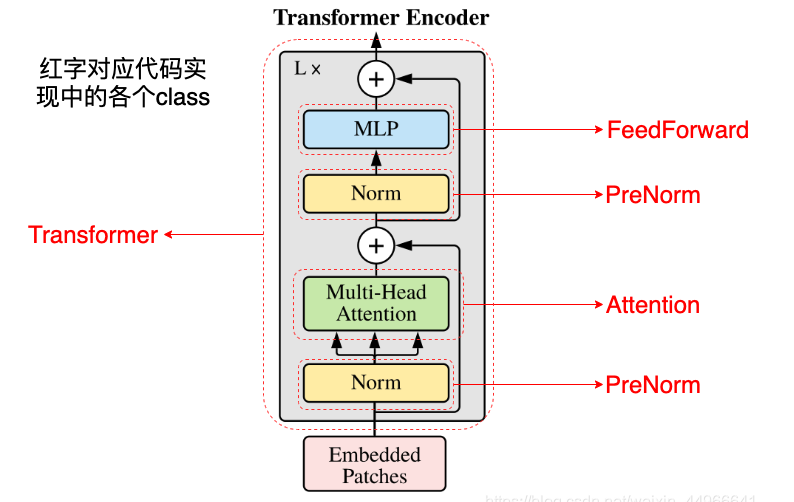